In [14]:
import open3d as o3d
import numpy as np
# Đọc file .ply
pcd = o3d.io.read_point_cloud("data/pointcloud_rgb_gpu.ply")

print("Số điểm ban đầu:", len(pcd.points))
print("point:", np.asarray(pcd.points))
print("color:", np.asarray(pcd.colors))




Số điểm ban đầu: 41322075
point: [[-0.2052251   0.16436617  1.80466104]
 [-0.42577735  0.45663148  1.80158639]
 [-0.49007803 -0.26903315  0.74435687]
 ...
 [ 2.5676022   0.54940529  0.98410527]
 [ 2.58256721 -0.08885211  2.21555281]
 [ 2.58039045 -0.10012794  2.86040115]]
color: [[0.30980392 0.28627451 0.22352941]
 [0.64705882 0.54901961 0.42745098]
 [0.67843137 0.65098039 0.58431373]
 ...
 [0.6627451  0.70980392 0.70196078]
 [0.36862745 0.40784314 0.41176471]
 [0.08235294 0.13333333 0.10196078]]


In [20]:
points = np.asarray(pcd.points)
pcd_tree = o3d.geometry.KDTreeFlann(pcd)

distances = []
for i in range(len(points)):
    [k, idx, d] = pcd_tree.search_knn_vector_3d(pcd.points[i], 2)  
    distances.append(np.sqrt(d[1]))

avg_nn_dist = np.mean(distances)
print("Average nearest neighbor distance:", avg_nn_dist)

Average nearest neighbor distance: 0.00860111364280839


In [5]:
# visualize point cloud
o3d.visualization.draw_geometries([pcd])

# ROTATE 3D Point cloud


In [8]:

# Fit plane with RANSAC
plane_model, inliers = pcd.segment_plane(distance_threshold=0.02,
                                         ransac_n=3,
                                         num_iterations=1000)
[a, b, c, d] = plane_model
normal = np.array([a, b, c])

# Chuẩn hóa vector pháp tuyến
normal /= np.linalg.norm(normal)

# Xác định ma trận quay: đưa normal -> [0, 0, 1]
z_axis = np.array([0,0,-1])
v = np.cross(normal, z_axis)
c = np.dot(normal, z_axis)
s = np.linalg.norm(v)
vx = np.array([[0, -v[2], v[1]],
               [v[2], 0, -v[0]],
               [-v[1], v[0], 0]])
R = np.eye(3) + vx + vx @ vx * ((1 - c) / (s**2))

# Áp dụng phép quay
pcd.rotate(R, center=(0,0,0))

# o3d.visualization.draw_geometries([pcd])


PointCloud with 41322075 points.

In [9]:
o3d.visualization.draw_geometries([pcd])


In [11]:
print(R)

[[ 0.83935418  0.54358391  0.00104496]
 [ 0.54358391 -0.83934738 -0.00353588]
 [-0.00104496  0.00353588 -0.9999932 ]]


In [25]:
y_min = min(pcd.points, key=lambda x: x[1])[1]
y_max = max(pcd.points, key=lambda x: x[1])[1]
x_min = min(pcd.points, key=lambda x: x[0])[0]
x_max = max(pcd.points, key=lambda x: x[0])[0]
z_min = min(pcd.points, key=lambda x: x[2])[2]
z_max = max(pcd.points, key=lambda x: x[2])[2]

print("x_min:", x_min, "x_max:", x_max)
print("y_min:", y_min, "y_max:", y_max)
print("z_min:", z_min, "z_max:", z_max)

x_min: -10.36619760505742 x_max: 3.3122437256260477
y_min: -5.465829155965705 y_max: 4.882576206099029
z_min: -2.774501140508136 z_max: 1.1425741937052905


In [26]:
bbox = pcd.get_axis_aligned_bounding_box()
print(bbox.get_extent())

[13.67844133 10.34840536  3.91707533]


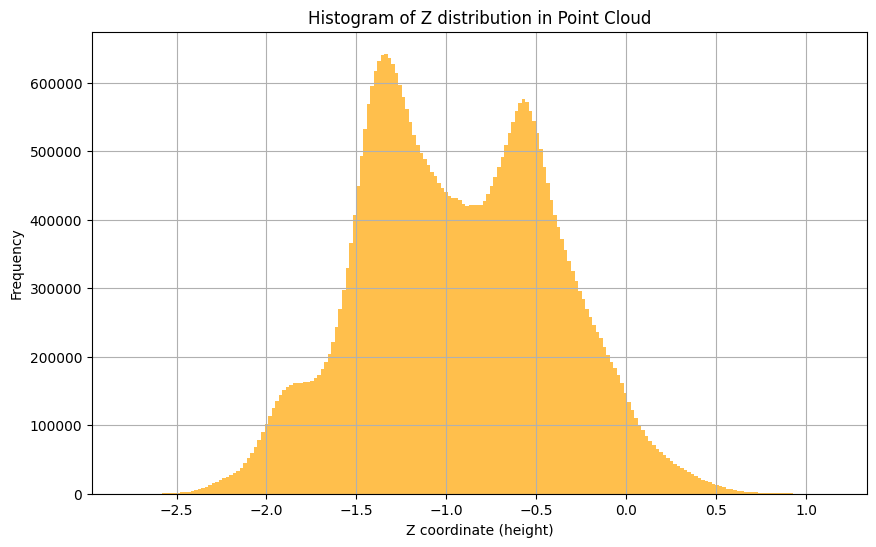

In [30]:
import matplotlib.pyplot as plt
# Chuyển thành numpy array
points = np.asarray(pcd.points)

# Trích trục Z
z_coords = points[:, 2]

# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist(z_coords, bins=200, color='orange', alpha=0.7)
plt.xlabel("Z coordinate (height)")
plt.ylabel("Frequency")
plt.title("Histogram of Z distribution in Point Cloud")
plt.grid(True)
plt.show()

In [ ]:
o3d.io.write_point_cloud("data/pcd.ply", pcd)

True

In [12]:

plane_model, inliers = pcd.segment_plane(distance_threshold=0.02,
                                         ransac_n=3,
                                         num_iterations=1000)
floor = pcd.select_by_index(inliers)           
pcd_wo_floor = pcd.select_by_index(inliers, invert=True) 

o3d.visualization.draw_geometries([floor])


[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [13]:
floor_points = np.asarray(floor.points)
z_mean = np.mean(floor_points[:,2])   # chiều cao trung bình Z
print(z_mean)

-1.3390426285289292


# Preprocessing

In [ ]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
pcd=o3d.io.read_point_cloud("data/pcd.ply")
o3d.visualization.draw_geometries([pcd])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
points = np.asarray(pcd.points)
pcd_tree = o3d.geometry.KDTreeFlann(pcd)

distances = []
for i in range(len(points)):
    [k, idx, d] = pcd_tree.search_knn_vector_3d(pcd.points[i], 2)  
    distances.append(np.sqrt(d[1]))

avg_nn_dist = np.mean(distances)
print("Average nearest neighbor distance:", avg_nn_dist)

Average nearest neighbor distance: 0.008601113642808389


### Downsample

Using uniform down sample with parameter every_k_points=5
 

In [4]:
pcd_uniform = pcd.uniform_down_sample(every_k_points=5)
print(pcd_uniform)
print("remove:", len(pcd.points) - len(pcd_uniform.points))
o3d.visualization.draw_geometries([pcd_uniform])

PointCloud with 8264415 points.
remove: 33057660


### Filtering and cleaning with statistical outlier removal

In [5]:
pcd_statistic, ind= pcd_uniform.remove_statistical_outlier(nb_neighbors=30,
                                                std_ratio=1.0)
print(pcd_statistic)
print("remove:", len(pcd_uniform.points) - len(pcd_statistic.points))


PointCloud with 7389639 points.
remove: 874776
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [6]:
o3d.visualization.draw_geometries([pcd_statistic])

In [8]:
points = np.asarray(pcd_statistic.points)
pcd_tree = o3d.geometry.KDTreeFlann(pcd_statistic)

distances = []
for i in range(len(points)):
    [k, idx, d] = pcd_tree.search_knn_vector_3d(pcd_statistic.points[i], 2)
    distances.append(np.sqrt(d[1]))

avg_nn_dist = np.mean(distances)
print("Average nearest neighbor distance:", avg_nn_dist)

Average nearest neighbor distance: 0.011868550059147286


### Filtering and cleaning with radius outlier removal

In [7]:
pcd_radius, ind = pcd_statistic.remove_radius_outlier(nb_points=3, radius=0.02)
print(pcd_radius)
print("remove:", len(pcd_statistic.points) - len(pcd_radius.points))
o3d.visualization.draw_geometries([pcd_radius])



PointCloud with 5621690 points.
remove: 1767949
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [ ]:
o3d.io.write_point_cloud("data/pcd_preprocess.ply", pcd_radius)

True

### Clustering and remove small cluster

In [10]:
from sklearn.cluster import DBSCAN

points = np.asarray(pcd_radius.points)

# DBSCAN với eps dựa trên ANND ~0.012
clustering = DBSCAN(eps=0.03, min_samples=20, n_jobs=-1).fit(points)
labels = clustering.labels_

unique_labels = set(labels)
print(f"Found {len(unique_labels) - (1 if -1 in labels else 0)} clusters")

# Lọc các cụm nhỏ (>= 100 điểm mới giữ)
indices_to_keep = []
for label in unique_labels:
    if label == -1:
        continue
    cluster_indices = np.where(labels == label)[0]
    if len(cluster_indices) > 100:   # threshold mạnh hơn
        indices_to_keep.extend(cluster_indices)

pcd_filtered = pcd_radius.select_by_index(indices_to_keep)

o3d.visualization.draw_geometries([pcd_filtered])

Found 8316 clusters


In [11]:
print("remove:", len(pcd_radius.points) - len(pcd_filtered.points))
print("Filtered point cloud has", len(pcd_filtered.points), "points.")    

remove: 1660258
Filtered point cloud has 3961432 points.


In [ ]:
o3d.io.write_point_cloud("data/pcd_filtered.ply", pcd_filtered)

True

# Post-Processing Analysis

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import random

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [ ]:


pcd_filtered=o3d.io.read_point_cloud("data/pcd_filtered.ply")
o3d.visualization.draw_geometries([pcd_filtered])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
points = np.asarray(pcd_filtered.points)
pcd_tree = o3d.geometry.KDTreeFlann(pcd_filtered)

distances = []
for i in range(len(points)):
    [k, idx, d] = pcd_tree.search_knn_vector_3d(points[i], 2)  
    distances.append(np.sqrt(d[1]))

avg_nn_dist = np.mean(distances)
print("Average nearest neighbor distance:", avg_nn_dist)

Average nearest neighbor distance: 0.010739226166346448


In [3]:
y_min = min(pcd_filtered.points, key=lambda x: x[1])[1]
y_max = max(pcd_filtered.points, key=lambda x: x[1])[1]
x_min = min(pcd_filtered.points, key=lambda x: x[0])[0]
x_max = max(pcd_filtered.points, key=lambda x: x[0])[0]
z_min = min(pcd_filtered.points, key=lambda x: x[2])[2]
z_max = max(pcd_filtered.points, key=lambda x: x[2])[2]

print("x_min:", x_min, "x_max:", x_max)
print("y_min:", y_min, "y_max:", y_max)
print("z_min:", z_min, "z_max:", z_max)

x_min: -9.428562855010945 x_max: 2.827222933876099
y_min: -4.980126390628311 y_max: 4.76471705725735
z_min: -2.3226672768126053 z_max: 0.5414483256217723


In [4]:
bbox = pcd_filtered.get_axis_aligned_bounding_box()
print(bbox.get_extent())

[12.25578579  9.74484345  2.8641156 ]


In [2]:
def robust_floor_segmentation(pcd, distance_threshold=0.02, ransac_n=3, num_iterations=1000, seed=42):
    np.random.seed(seed)
    random.seed(seed)
    o3d.utility.random.seed(seed)

    plane_model, inliers = pcd.segment_plane(
        distance_threshold=distance_threshold,
        ransac_n=ransac_n,
        num_iterations=num_iterations
    )
    inlier_cloud = pcd.select_by_index(inliers)
    z_mean = np.mean(np.asarray(inlier_cloud.points)[:, 2])

    floor_cloud = pcd.select_by_index(inliers)
    pcd_wo_floor = pcd.select_by_index(inliers, invert=True)

    return floor_cloud, pcd_wo_floor, z_mean, plane_model


pcd = o3d.io.read_point_cloud("data/pcd.ply")
floor, pcd_wo_floor, floor_z, plane_model = robust_floor_segmentation(pcd)
print(f"Estimated floor height (z): {floor_z}")


Estimated floor height (z): -1.6278020672161773


In [3]:
o3d.visualization.draw_geometries([floor])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
